In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import poisson
spy = yf.download('spy')
spy['20 ma'] = spy['Adj Close'].rolling(9).mean()
spy['50 ma'] = spy['Adj Close'].rolling(20).mean()
spy= spy[['Adj Close','20 ma','50 ma']]
spy = spy[50:]
spy['combined'] = np.where((spy['20 ma'].shift(-1)< spy['50 ma'].shift(-1)) & (spy['20 ma']>spy['50 ma']),1,
                           np.where((spy['20 ma'].shift(-1)>spy['50 ma'].shift(-1)) & (spy['20 ma']<spy['50 ma']),
                            -1,
                            0))

[*********************100%***********************]  1 of 1 completed


In [109]:
temp = 0 
trend = False
compilation = []
for i in spy.index:
    c = spy['combined'].loc[i]
    if c == 1:#start of trend
        trend = True
    elif c == -1: #end of trend
        trend = False
        compilation.append(temp)
        temp = 0
    elif trend == True and c == 0 :
        temp+=1       

In [110]:
averageTrend = np.mean(compilation)
averageTrend

13.298342541436464

(array([12.,  6., 10.,  5.,  6., 17.,  8., 14., 11.,  2., 13.,  9.,  9.,
         3.,  6., 13.,  2.,  2.,  6.,  1.,  6.,  1.,  0.,  1.,  3.,  4.,
         0.,  1.,  2.,  2.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,
         1.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ,
        13.2, 14.4, 15.6, 16.8, 18. , 19.2, 20.4, 21.6, 22.8, 24. , 25.2,
        26.4, 27.6, 28.8, 30. , 31.2, 32.4, 33.6, 34.8, 36. , 37.2, 38.4,
        39.6, 40.8, 42. , 43.2, 44.4, 45.6, 46.8, 48. ]),
 <BarContainer object of 40 artists>)

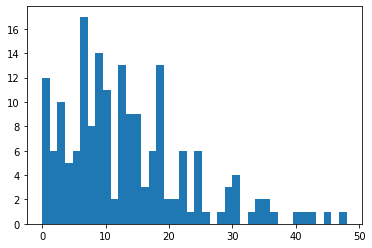

In [111]:
plt.hist(compilation, bins = 40)

In [112]:
trendHours = 6.5 * averageTrend
trendHours

86.43922651933701

# Buy at 6 days of clear momentum, and sell at day 13?